In [75]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [76]:
data=pd.read_csv("weight-height.csv")

In [77]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
data.shape

(10000, 3)

In [80]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [82]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [83]:
data=data.drop('Gender',axis=1)

In [84]:
data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


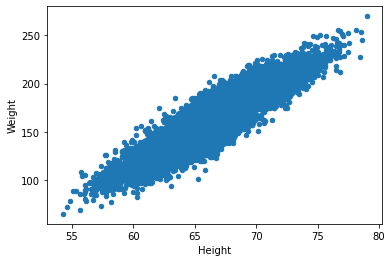

In [85]:
data.plot(kind="scatter",x='Height',y='Weight')
plt.show()

<AxesSubplot:>

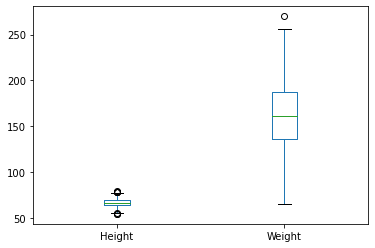

In [86]:
data.plot(kind="box")# to check outlier


In [87]:
data.corr()# for correlation

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [88]:
Q1 = data.Height.quantile(0.25)
Q3 = data.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [89]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [90]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [91]:
data[(data.Height<lower_limit)|(data.Height>upper_limit)]

,Height,Weight
994,78.095867,255.690835
1317,78.462053,227.342565
2014,78.998742,269.989699
3285,78.528210,253.889004
3757,78.621374,245.733783
6624,54.616858,71.393749
7294,54.873728,78.606670
9285,54.263133,64.700127


In [92]:
data_no_outlier = data[(data.Height>lower_limit)&(data.Height<upper_limit)]
data_no_outlier.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [93]:
data_no_outlier.shape

(9992, 2)

In [97]:
Height=pd.DataFrame(data_no_outlier["Height"])
Weight=pd.DataFrame(data_no_outlier["Weight"])

<AxesSubplot:>

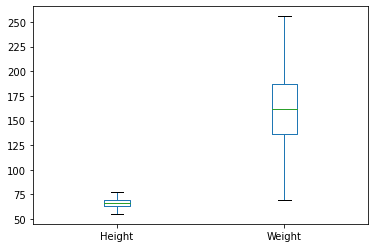

In [98]:
data_no_outlier.plot(kind="box")

In [99]:
Height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [101]:
lm=LinearRegression()
model=lm.fit(Height,Weight)

In [102]:
model.coef_

array([[7.7195054]])

In [103]:
model.intercept_

array([-350.88226001])

In [104]:
model.score(Height,Weight)

0.8543571768031312

In [108]:
Height_new=69.881796
Weight_predict=model.predict([[Height_new]])
Weight_predict

array([[188.57064163]])

In [109]:
Height_new1=[73.847017,74.110105,69.034243]
X=pd.DataFrame(Height_new1)
y=model.predict(X)
y=pd.DataFrame(y)
data1=pd.concat([X,y],axis=1,keys=['Height_new','Weight_new'])
data1

,Height_new,Weight_new
,0,0
0,73.847017,219.180187
1,74.110105,221.211096
2,69.034243,182.027952


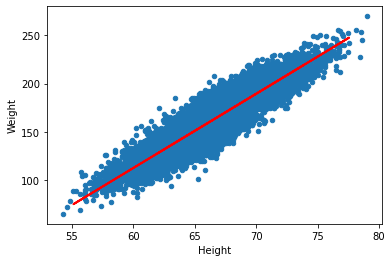

In [115]:
data.plot(kind="scatter",x='Height',y='Weight')
plt.plot(Height,model.predict(Height),color='red',linewidth=2)
plt.plot(Height_new,Weight_predict,color='yellow')

plt.show()